In [1]:
import numpy as np

# Packages for fft and fitting data
from scipy import fftpack as fft
from sklearn.linear_model import Lasso

# Package for importing image representation
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

from src.V1_reconst import reconstruct

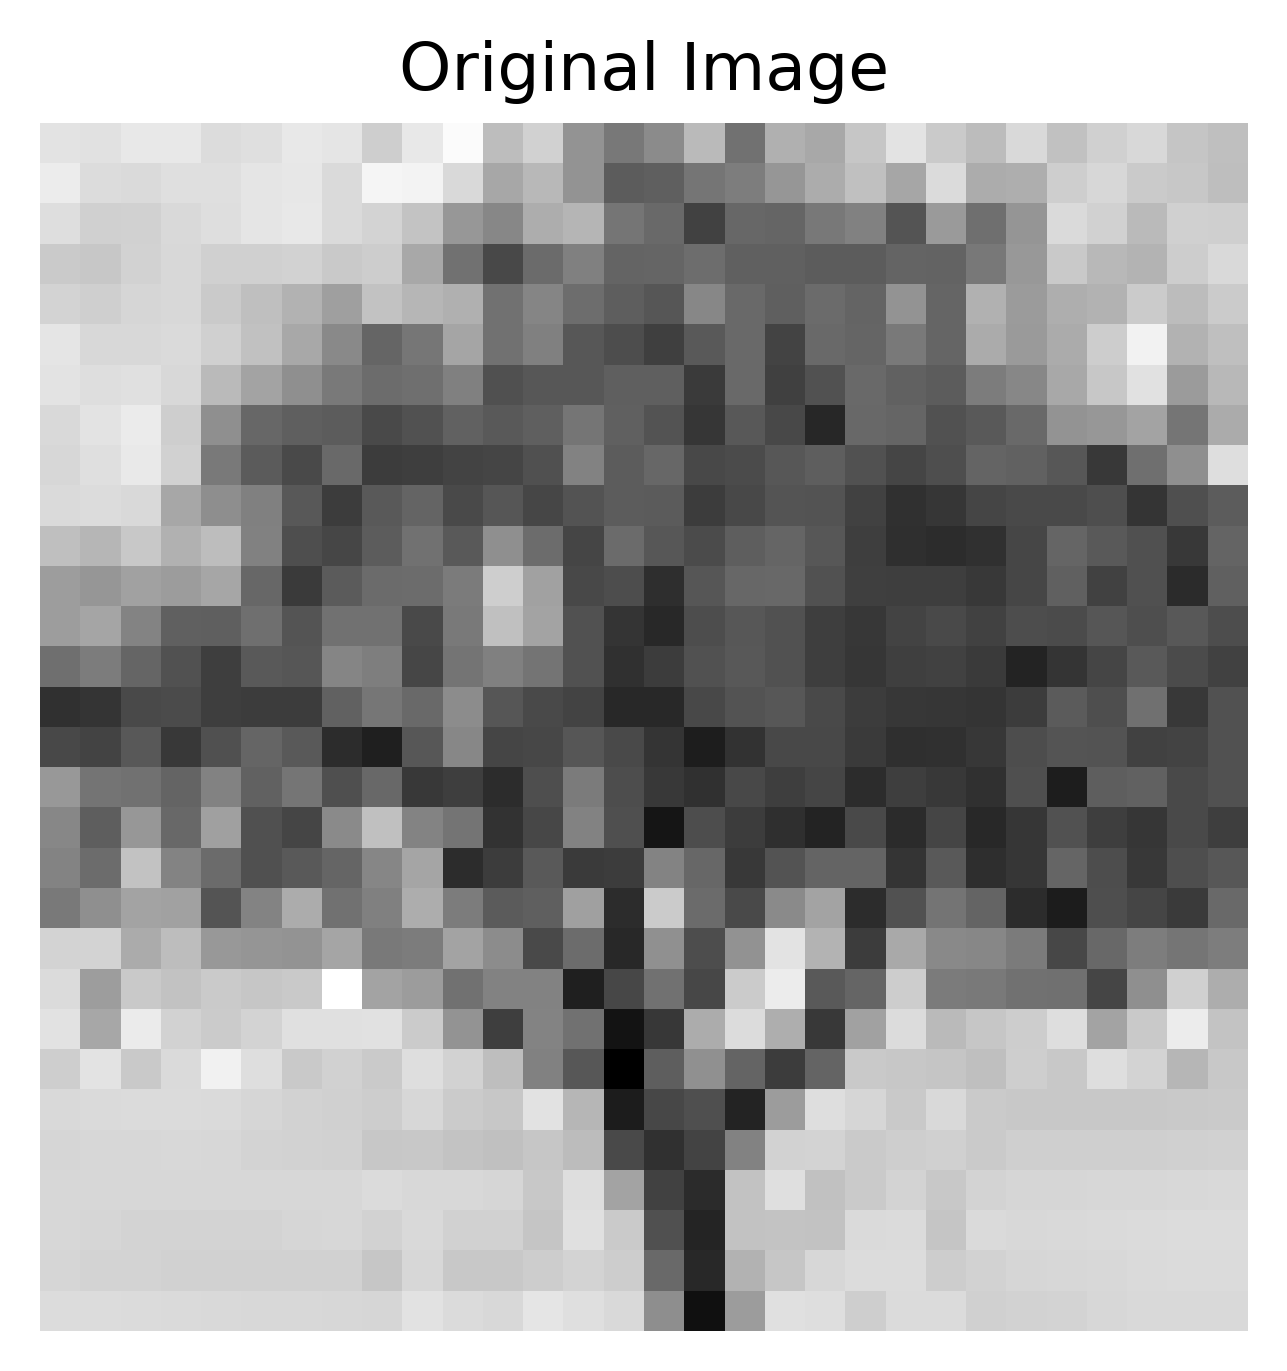

In [120]:
file = 'tree_part1.jpg'
image_path = 'image/{image}'.format(image = file)
image_nm = file.split('.')[0]

# Read Image in GrayScale and show grayscale image
plt.figure(dpi = 400)
img = Image.open(image_path)
img = ImageOps.grayscale(img)
img_arr = np.asarray(img)
plt.imshow(img_arr, 'gray')
plt.title("Original Image")
plt.axis('off')
plt.savefig("result/{img_nm}/Classical/alpha_reconst/Original_image.png".format(img_nm = image_nm), dpi = 1000)
plt.show()

## For one Comparison

32.45324013092736


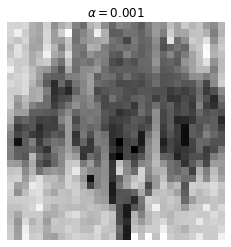

In [52]:
# Genrate y
cn, cm = img_arr.shape
classical_samp = np.floor(cn * cm * 0.5).astype(int)
rand_index = np.random.randint(0, cn * cm, classical_samp)
classical_y = img_arr.flatten()[rand_index].reshape(classical_samp, 1)
alpha = 0.001

# Generate C matrix
classical_y = classical_y * np.sqrt(cn * cm)
C = np.eye(cn * cm)[rand_index, :] * np.sqrt(cn * cm)
C3D = C.reshape(classical_samp, cn, cm)
theta, classical_reconst, s = reconstruct(C3D, classical_y, alpha)

error = np.linalg.norm(img_arr - classical_reconst, 'fro') / np.sqrt(cm*cn)
print(error)
plt.imshow(classical_reconst, 'gray')
plt.title("$\\alpha = {alp}$".format(alp = alpha))
plt.axis('off')
plt.clim(0, 255)
plt.show()

In [4]:
classical_reconst

array([[ 67.0229965 ,  69.67050204,  64.06247004, ..., 137.82179466,
        137.12804412, 134.21345912],
       [ 66.89527341,  67.07324734,  59.54223465, ..., 135.01512118,
        133.56011127, 138.42395365],
       [ 62.61069252,  64.33771648,  65.12868639, ..., 137.70956878,
        130.50987388, 126.24432379],
       ...,
       [ 81.4319411 ,  75.32217027,  80.39194011, ..., 128.93942212,
        135.08267145, 146.9869355 ],
       [ 88.91880212,  82.14108796,  76.29142829, ..., 137.92288494,
        139.12922222, 152.75678659],
       [ 89.86067238,  80.96079617,  77.05266796, ..., 140.46601467,
        148.45542161, 157.69815274]])

## For multiple Comparison

54.89766236674685


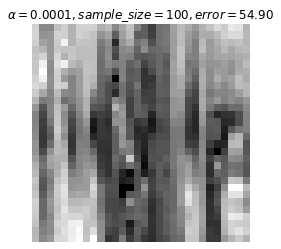

55.15318062753347


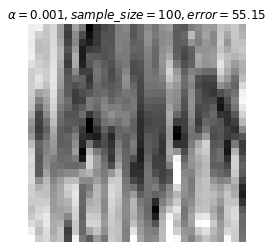

53.96800492472883


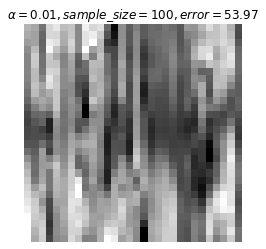

39.69613751151783


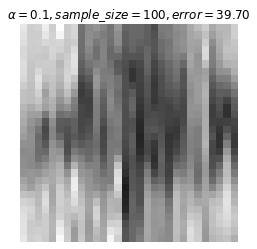

38.654897634208154


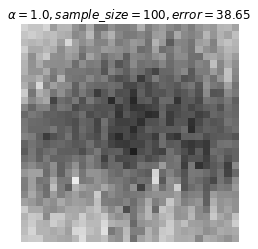

48.589836614483715


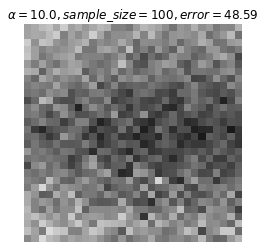

40.143921637583496


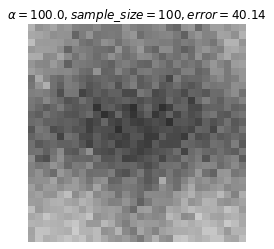

56.53142685464628


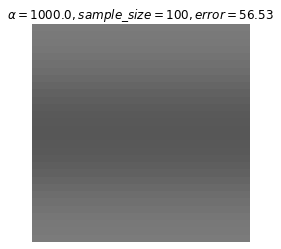

In [124]:
# Genrate 
cn, cm = img_arr.shape
# sample_sz = 0.2
sample_sz = 100
alpha_list = np.logspace(-4, 3, 8)

for alpha in alpha_list:
#     classical_samp = np.floor(cn * cm * sample_sz).astype(int)
    classical_samp = sample_sz
    rand_index = np.random.randint(0, cn * cm, classical_samp)
    
    classical_y = img_arr.flatten()[rand_index].reshape(classical_samp, 1)

    # Generate C matrix
    classical_y = classical_y * np.sqrt(cn * cm)
    C = np.eye(cn * cm)[rand_index, :] * np.sqrt(cn * cm)
    C3D = C.reshape(classical_samp, cn, cm)

    theta, classical_reconst, s = reconstruct(C3D, classical_y, alpha)

    error = np.linalg.norm(img_arr - classical_reconst.astype(int), 'fro') / np.sqrt(cm*cn)
    print(error)
    
    title = "$\\alpha = {alpha}, sample\_size = {sample_sz}, error = {err:.2f}$".format(
        alpha = alpha, sample_sz = sample_sz, err = error)
    plt.imshow(classical_reconst.astype(int), 'gray')
    plt.clim(0, 255)
    plt.title(title)
    plt.axis('off')
    plt.savefig("result/{img_nm}/Classical/alpha_reconst/alpha_{alp}_sample_{samp}.png".
                        format(img_nm = image_nm, alp = alpha, samp = sample_sz), dpi = 300)
    plt.show()

36.81361471899588


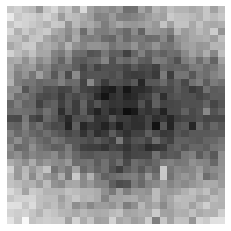

In [131]:
classical_samp = 100
alpha = 10
rand_index = np.random.randint(0, cn * cm, classical_samp)

classical_y = img_arr.flatten()[rand_index].reshape(classical_samp, 1)

# Generate C matrix
classical_y = classical_y * np.sqrt(cn * cm)
C = np.eye(cn * cm)[rand_index, :] * np.sqrt(cn * cm)
C3D = C.reshape(classical_samp, cn, cm)

theta, classical_reconst, s = reconstruct(C3D, classical_y, alpha)

error = np.linalg.norm(img_arr - classical_reconst, 'fro') / np.sqrt(cm*cn)
print(error)

# title = "$\\alpha = {alpha}, sample\_size = {sample_sz}, error = {err:.2f}$".format(
#     alpha = alpha, sample_sz = sample_sz, err = error)
plt.imshow(classical_reconst.astype(int), 'gray')
plt.clim(0, 255)
# plt.title(title)
plt.axis('off')
plt.savefig("result/{img_nm}/Classical/alpha_reconst/alpha_{alp}_sample_{samp}_image.png".
                    format(img_nm = image_nm, alp = alpha, samp = sample_sz), dpi = 300)
plt.show()

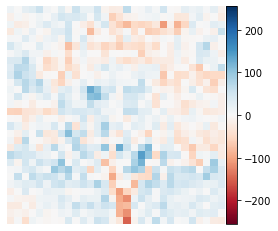

In [132]:
ax = plt.imshow(img_arr - classical_reconst, cmap='RdBu')
plt.axis('off')
plt.colorbar(ax, pad = 0.005)
plt.clim((-255, 255))
plt.savefig("result/{img_nm}/Classical/alpha_reconst/error_img_alpha_{alp}_sample_{samp}.png".
                    format(img_nm = image_nm, alp = alpha, samp = sample_sz, err = error), dpi = 300)

In [11]:
alpha = 3
'{image} image reconstruction with alpha {alp}.png'.format(image = image_nm,
                                                                       alp = alpha).replace(' ', '_')

'tree_part1_image_reconstruction_with_alpha_3.png'

In [27]:
classical_reconst

array([[0.37596825, 0.37596825, 0.37596825, ..., 0.37596825, 0.37596825,
        0.37596825],
       [0.37596825, 0.37596825, 0.37596825, ..., 0.37596825, 0.37596825,
        0.37596825],
       [0.37596825, 0.37596825, 0.37596825, ..., 0.37596825, 0.37596825,
        0.37596825],
       ...,
       [0.37596825, 0.37596825, 0.37596825, ..., 0.37596825, 0.37596825,
        0.37596825],
       [0.37596825, 0.37596825, 0.37596825, ..., 0.37596825, 0.37596825,
        0.37596825],
       [0.37596825, 0.37596825, 0.37596825, ..., 0.37596825, 0.37596825,
        0.37596825]])

In [31]:
213 - 113

100

In [69]:
900 /500

1.8

In [71]:
img_arr.shape

(164, 307)

In [72]:
164 * 307 / 1.8

27971.11111111111